# Tarea 1.3 - Algoritmo de Canny

Algoritmo:
1. Suavizar: Desenfoque de la imagen para eliminar el ruido.
2. Encontrar gradientes: los bordes deben estar marcados en los gradientes de la imagen que tiene magnitudes grandes.
3. No supresión máxima: Sólo los máximos locales se debe marcar como bordes.
4. Umbralización doble: Los posibles bordes deben estár determinados por umbralización.
5. Seguimiento por histéresis: Los bordes finales se determinan mediante la supresión de todas las aristas que no están conectados a una muy determinada borde (fuerte).

In [77]:
# importacion de las librerias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

[[ 2  4  5  4  2]
 [ 4  9 12  9  4]
 [ 5 12 15 12  5]
 [ 4  9 12  9  4]
 [ 2  4  5  4  2]]


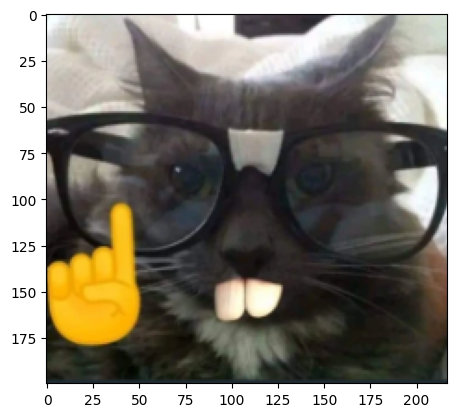

In [78]:
# 1. Suavizar la imagen para eliminar el ruido

# para esto se aplica un filtro gausssiano de 5x5
foto = 'prueba.png'
# se carga la imagen
imag = cv2.imread(foto,1)   # se lee la imagen en BGR
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)   # convierte la imagen a RGB
plt.imshow(imag)   # muestra la imagen
filas, columnas, _ = imag.shape

gauss = np.array([[2, 4, 5, 4, 2],
                  [4, 9, 12, 9, 4],
                  [5, 12, 15, 12, 5],
                  [4, 9, 12, 9, 4],
                  [2, 4, 5, 4, 2]])

print(gauss)

In [79]:
def separacionCanales(imagen):
     # Divide la imagen en sus 3 canales RGB
     r, g, b = cv2.split(imagen)

     # Convierte los canales en matrices NumPy
     matriz_rojo = np.array(r)
     matriz_verde = np.array(g)
     matriz_azul = np.array(b)

     return matriz_rojo, matriz_verde, matriz_azul

In [80]:
# se realiza el proceso de convolucion
def convolucion(imagen, kernel):
     convolucion_r = np.zeros((filas, columnas))
     convolucion_g = np.zeros((filas, columnas))
     convolucion_b = np.zeros((filas, columnas))

     matriz_rojo,matriz_verde,matriz_azul = separacionCanales(imagen)

     for x in range(filas):
          for y in range(columnas):
               for x2 in range(len(kernel)):
                    for y2 in range(len(kernel[0])):
                         if(len(kernel[0]) == 5):
                              if(x>2 and x<filas-2 and y>2 and y<columnas-2):
                                   convolucion_r[x,y] += (kernel[x2,y2] * matriz_rojo[x-2+x2,y-2+y2])
                                   convolucion_g[x,y] += (kernel[x2,y2] * matriz_verde[x-2+x2,y-2+y2])
                                   convolucion_b[x,y] += (kernel[x2,y2] * matriz_azul[x-2+x2,y-2+y2])
                         if(len(kernel[0]) == 3):     
                              if(x>1 and x<filas-1 and y>1 and y<columnas-1):
                                   convolucion_r[x,y] += (kernel[x2,y2] * matriz_rojo[x-1+x2,y-1+y2])
                                   convolucion_g[x,y] += (kernel[x2,y2] * matriz_verde[x-1+x2,y-1+y2])
                                   convolucion_b[x,y] += (kernel[x2,y2] * matriz_azul[x-1+x2,y-1+y2])

     return convolucion_r, convolucion_g, convolucion_b

In [81]:
def unionCanales(rojo,verde,azul,divisor):
     # matriz que contiene la nueva imagen 
     union_imgs = np.zeros((filas,columnas,3), dtype=np.uint8)
          
     # Asigna valores a cada canal de color
     union_imgs[:,:,0] = rojo/divisor  # valores de rojo
     union_imgs[:,:,1] = verde/divisor  # valores de verde
     union_imgs[:,:,2] = azul/divisor  # valores de azul


     return union_imgs

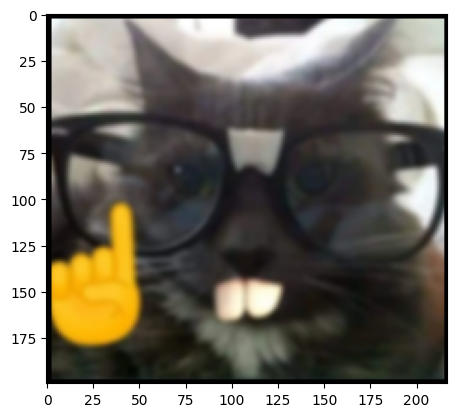

In [82]:
rojo,verde,azul = convolucion(imag, gauss)
matGauss = unionCanales(rojo,verde,azul,159)

# Crea una imagen RGB desde la matriz tridimensional
imgGauss= Image.fromarray(matGauss)
plt.imshow(imgGauss)

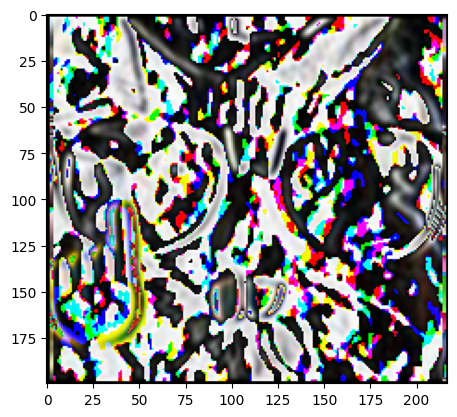

In [83]:
# 2. Encontrar gradientes de la imagen para detectar los bordes
imgGauss = np.float64(imgGauss)

sobelX = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

rojoSX,verdeSX,azulSX = convolucion(matGauss, sobelX)
matSobelX = unionCanales(rojoSX,verdeSX,azulSX,1)
imgSobelX = Image.fromarray(matSobelX)
plt.imshow(imgSobelX)

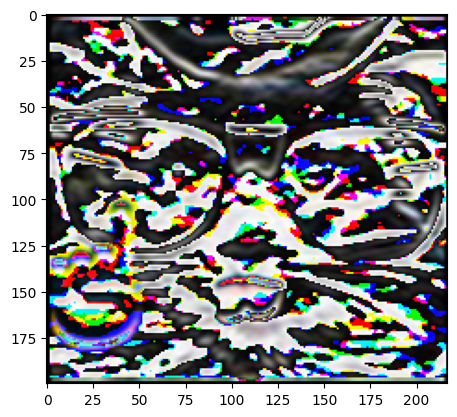

In [84]:
sobelY = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])
rojoSY,verdeSY,azulSY = convolucion(matGauss, sobelY)
matSobelY = unionCanales(rojoSY,verdeSY,azulSY,1)
imgSobelY = Image.fromarray(matSobelY)
plt.imshow(imgSobelY)

In [85]:
def magnitudGradiente(derivadaX, derivadaY):
    gm = (derivadaX ** 2 + derivadaY ** 2) ** 0.5
    return gm

def direccionGradiente(derivadaX, derivadaY):
    gd = np.rad2deg(np.arctan2(derivadaY, derivadaX))
    return gd


In [86]:
# Cambia el nombre de las variables para evitar conflictos
imagen_sobelX = Image.fromarray(matSobelX)
imagen_sobelY = Image.fromarray(matSobelY)

# Luego, calcula la magnitud del gradiente y dirección del gradiente
gmRojoX, gmVerdeX, gmAzulX = separacionCanales(imagen_sobelX)
gmRojoY, gmVerdeY, gmAzulY = separacionCanales(imagen_sobelY)

gmRojoX = magnitudGradiente(gmRojoX, gmRojoY)
gmVerdeX = magnitudGradiente(gmVerdeX, gmVerdeY)
gmAzulX = magnitudGradiente(gmAzulX, gmAzulY)

gmRojoY = magnitudGradiente(gmRojoX, gmRojoY)
gmVerdeY = magnitudGradiente(gmVerdeX, gmVerdeY)
gmAzulY = magnitudGradiente(gmAzulX, gmAzulY)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'split'
> Overload resolution failed:
>  - m is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'm'


In [ ]:
matGm = unionCanales(gmRojoX, gmVerdeX, gmAzulX, 1)
imgGm = Image.fromarray(matGm)
plt.imshow(imgGm)

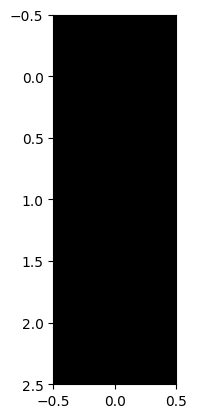

In [ ]:
matGd = unionCanales(gmRojoY, gmVerdeY, gmAzulY, 1)
imgGd = Image.fromarray(matGd)
plt.imshow(imgGd)